In this notebook, we create versions of the images from [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) as examples for Lab 5. 

In [1]:
# Import block 
# (What else is missing?)

%matplotlib notebook 
# Note the difference here!

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d # <-- New line
import matplotlib.pyplot as plt

In [37]:
students = pd.read_csv("../Lab03/students_info.csv")
justtwo = students[['gym','coffee']].to_numpy()
justtwo

array([[5.90e+01, 7.00e-01],
       [1.11e+02, 2.00e+00],
       [5.20e+01, 1.50e+00],
       [1.02e+02, 2.10e+00],
       [5.00e+01, 7.00e-01],
       [0.00e+00, 3.00e-01],
       [1.20e+02, 6.00e-01],
       [4.60e+01, 1.30e+00],
       [8.30e+01, 2.30e+00],
       [9.50e+01, 2.30e+00],
       [1.18e+02, 9.00e-01],
       [1.40e+02, 2.30e+00],
       [5.00e+01, 1.30e+00],
       [1.30e+02, 1.90e+00],
       [4.50e+01, 2.00e-01],
       [6.80e+01, 1.20e+00],
       [5.40e+01, 1.30e+00],
       [2.00e+01, 3.00e-01],
       [1.03e+02, 1.00e+00],
       [1.03e+02, 7.00e-01],
       [1.70e+01, 5.00e-01],
       [3.80e+01, 5.00e-01],
       [6.20e+01, 1.40e+00],
       [1.24e+02, 9.00e-01],
       [1.22e+02, 8.00e-01],
       [9.10e+01, 1.40e+00],
       [4.00e+01, 4.00e-01],
       [6.50e+01, 1.40e+00],
       [1.44e+02, 8.00e-01],
       [7.40e+01, 1.20e+00],
       [9.00e+01, 2.10e+00],
       [1.26e+02, 2.00e+00],
       [3.60e+01, 1.20e+00],
       [1.04e+02, 1.90e+00],
       [1.16e+

### Scale the data

Here we standardize the data

In [40]:
mean_vec = np.mean(justtwo, axis=0)
print(mean_vec)

sd_vec = np.std(justtwo, axis=0)
print(sd_vec)

[78.74333333  1.17666667]
[37.35136038  0.64579839]


<IPython.core.display.Javascript object>


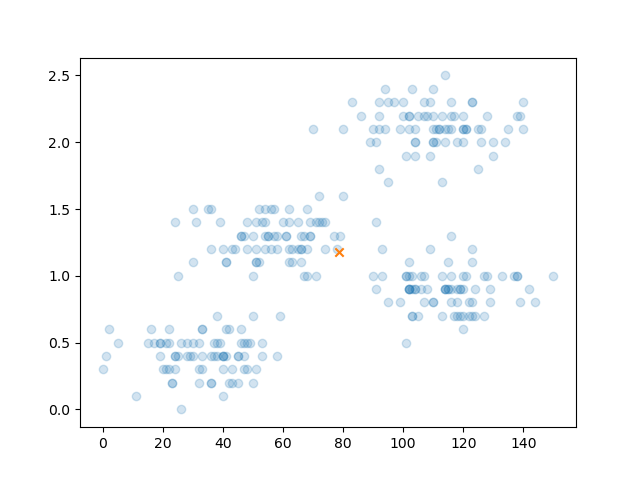

In [32]:
plt.scatter(justtwo[:,0], justtwo[:,1], alpha = 0.2)
plt.scatter(mean_vec[0], mean_vec[1], marker='x')

To standardize the variables, we use the following formula:

$ x_{norm} = \dfrac{x - \bar{x}}{x_{\sigma}}$

<IPython.core.display.Javascript object>


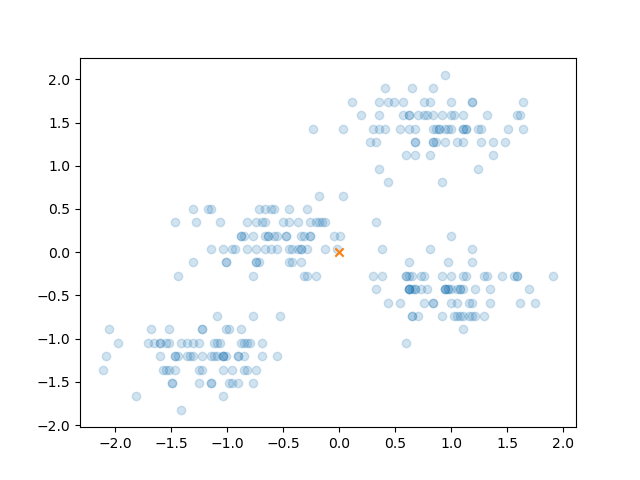

In [42]:
justtwo_norm = justtwo.copy()

for i in range(2):
    justtwo_norm[:,i] = (justtwo[:,i] - mean_vec[i]*np.ones(justtwo_norm.shape[0]))/sd_vec[i]
    
justtwo_norm
plt.scatter(justtwo_norm[:,0], justtwo_norm[:,1], alpha = 0.2)
plt.scatter(0, 0, marker='x')

In [51]:
pca2 = PCA(n_components=2)
pca2.fit(justtwo_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
print(pca2.components_[0,:])
print(pca2.components_[0,:]*3*np.sqrt(pca2.explained_variance_[0]))
print(pca2.components_[1,:])
print(pca2.components_[1,:]*3*np.sqrt(pca2.explained_variance_[1]))
print(pca2.mean_)

[-0.70710678 -0.70710678]
[-2.6366664 -2.6366664]
[ 0.70710678 -0.70710678]
[ 1.4415584 -1.4415584]
[-1.29526020e-16 -1.27490611e-16]


<IPython.core.display.Javascript object>


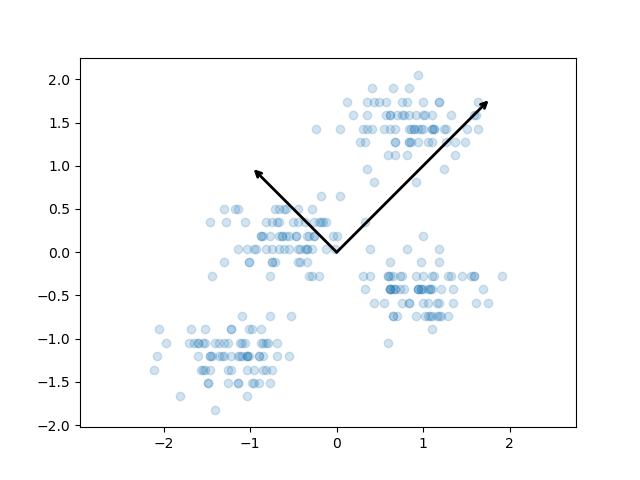

[1.7577776 1.7577776]
[-0.96103894  0.96103894]


(-2.3156275832694333,
 2.1151886543913805,
 -2.0245215096893583,
 2.2516305731553627)

In [100]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
#plt.xlim(-3,3)
#plt.ylim(-3,3)

plt.scatter(justtwo_norm[:, 0], justtwo_norm[:, 1], alpha=0.2)
for c in range(2):
    vector = pca2.components_[c,:]
    length = pca2.explained_variance_[c]
    v = vector * (-2) * np.sqrt(length)
    print(v)
    draw_vector(pca2.mean_, pca2.mean_ + v)
plt.axis('equal')

<IPython.core.display.Javascript object>


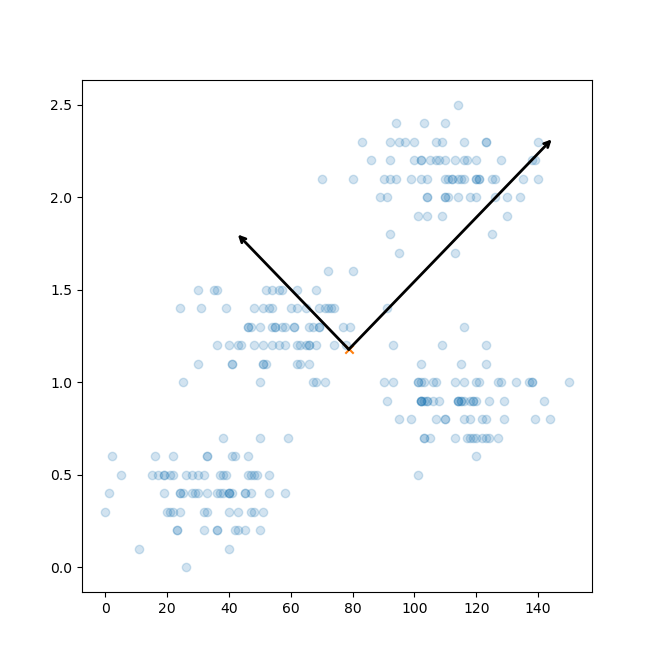

In [110]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
#plt.xlim(-3,3)
#plt.ylim(-3,3)

plt.scatter(justtwo[:, 0], justtwo[:, 1], alpha=0.2)
plt.scatter(mean_vec[0], mean_vec[1],marker="x")
for c in range(2):
    vector = pca2.components_[c,:]
    length = pca2.explained_variance_[c]
    v = vector * (-2) * np.sqrt(length) * sd_vec
    draw_vector(mean_vec, mean_vec + v)
    


In [111]:
pca1 = PCA(n_components=1)
pca1.fit(justtwo_norm)


PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<IPython.core.display.Javascript object>


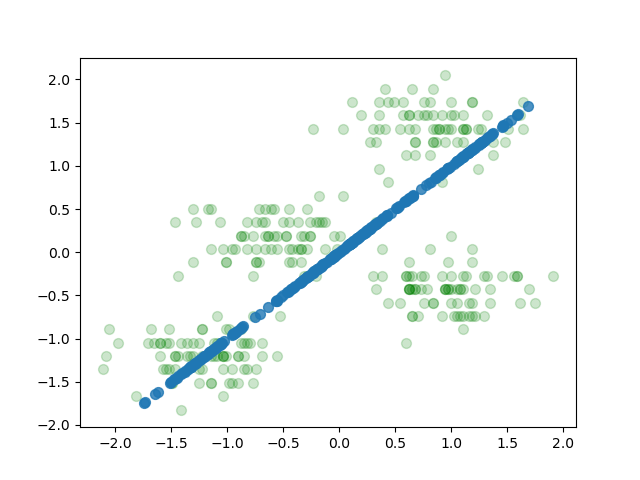

In [124]:
just1 = pca1.transform(justtwo_norm)

just1_new = pca1.inverse_transform(just1)
plt.scatter(justtwo_norm[:, 0], justtwo_norm[:, 1], alpha=0.2, c="green", s=50)
plt.scatter(just1_new[:, 0], just1_new[:, 1], alpha=0.8, s=50)

<IPython.core.display.Javascript object>


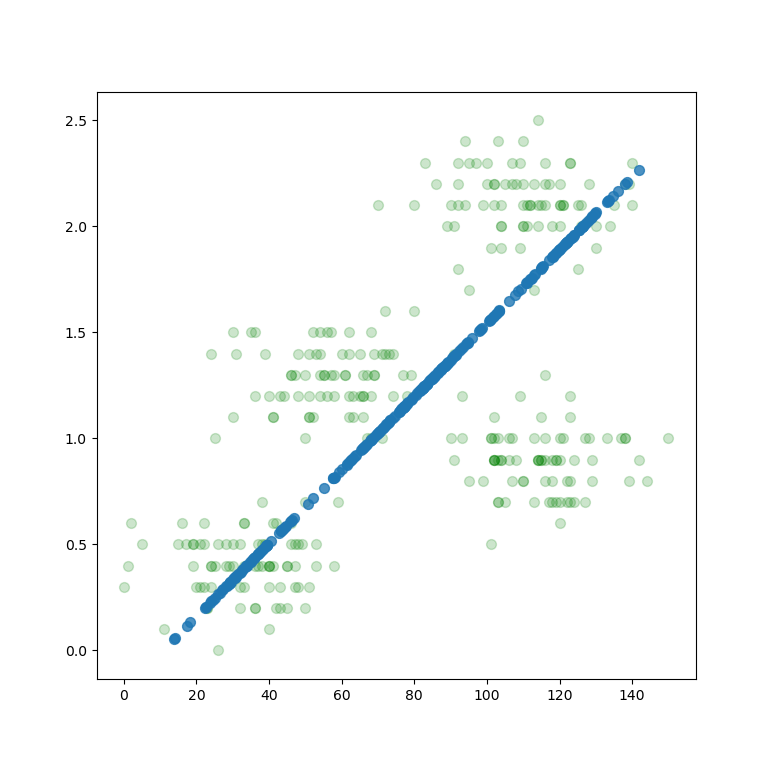

In [125]:
plt.scatter(justtwo[:, 0], justtwo[:, 1], alpha=0.2, c="green", s=50)
plt.scatter(just1_new[:, 0]*sd_vec[0]+mean_vec[0], 
            just1_new[:, 1]*sd_vec[1]+mean_vec[1], alpha=0.8, s=50)

#### References Consulted
0. [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
1. [std() helpfile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)
2. [Seeting an axis range](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/4/ch04lvl1sec53/setting-an-axis-range)
3. [Scaling both the axes equally](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/4/ch04lvl1sec52/scaling-both-the-axes-equally)